<a href="https://colab.research.google.com/github/arash7m/LogisticRegressionTitanic/blob/main/Logistic_Regression_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import plotly.graph_objects as go

In [3]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Udemy Machine Learning/13-Logistic-Regression/titanic_train.csv")

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Sometimes we have missing data. So let's doa heatmap to see where most of the missing data is located.

For example the "NaN" values above indicate the missing values

In [ ]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


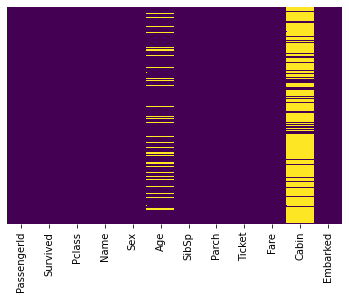

In [4]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

As we can see, the Cabin feature has a big chunk of its data missing. It's so big that in the future we either have to drop it, or change it in some way.


# Part I: Visualizations


Let's do some visualizations for now to better understand the data.

In [ ]:
sns.set_style('darkgrid')

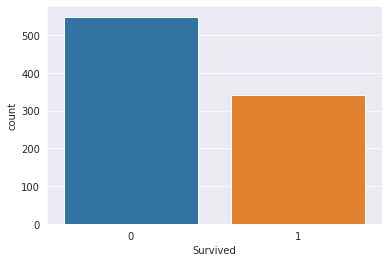

In [ ]:
sns.countplot(x='Survived', data=train)

Around 550 people didn't survive, judging from this database. And 330 people survived, roughly speaking.

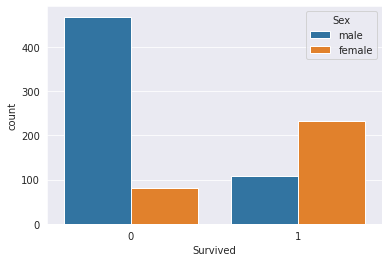

In [ ]:
 sns.countplot(x='Survived', hue='Sex', data=train)

The people who didn't survive where mostly male, while the people who did survive were mostly female (even more than half)

It's going to come in play where we are checking the factors of coefficiency that led to survival of some.

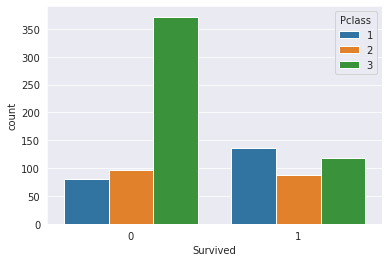

In [ ]:
#Pclass stands for Passenger Class
sns.countplot(x='Survived', hue='Pclass', data=train)

So most of the people that didn't survive were in the 3rd class (the cheapest) and most of the survivors, although not that drasting, are leaning more towards 1st class (the most expensive).

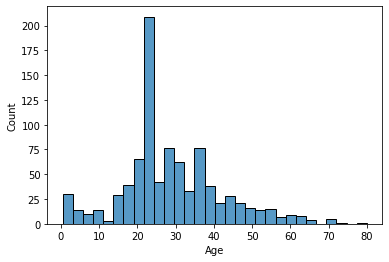

In [ ]:
sns.histplot(train['Age'].dropna(), kde=False, bins=30)
#dropna() to drop the Null values
#kde=False because we just want to see a distribution plot

Many children, and the average age is around 20-30 so quite a number of young passengers. 

Now let's explore some of the other columns.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


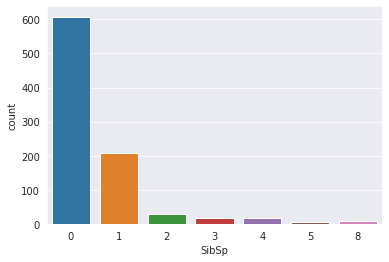

In [ ]:
#SibSp is for the number of siblings or spouses
sns.countplot(x='SibSp',data=train)

Most people didn't have spouses or children on board. They were mostly single. Probably mostly young men.

In [ ]:
train['Fare']
#The fares the passengers paid

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

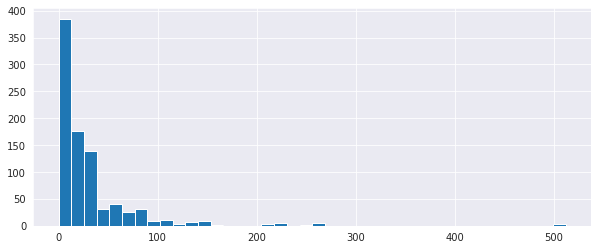

In [ ]:
train['Fare'].hist(bins=40, figsize=(10,4))

Most of the fares were paid by the people in the lower classes, therefore from 0 to below 100.

If we wanted to take a look at the interactive histogram of it:

In [ ]:
import plotly.express as px
fig = px.histogram(train, x="Fare")
fig.show()

# Part II: Cleaning Data and Filling Missing Values

Earlier we saw Cabin and Age had a lot of missing values.

First let's get to "Age". We can calculate the mean of "Age" and replace every missing data with that or we can be a bit smarter and calculate the mean of "Age" in every class and replace the missing values with an eye to their respective class.

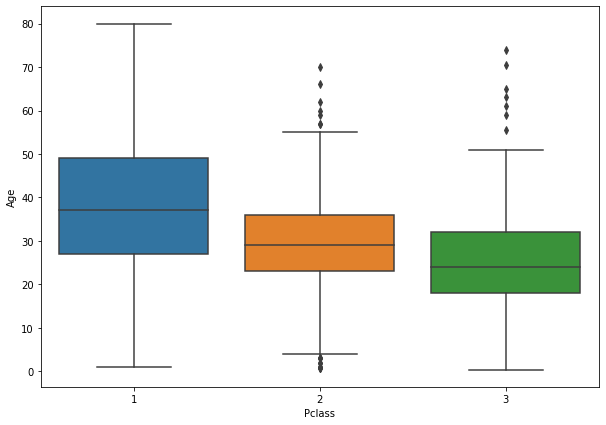

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

The passengers in the first class tend to be older than the lower classes.

We create a function to impute the missing age values with the mean of their respective class.

The mean of Class 1: 37

The mean of Class 2: 29

the mean of Class 3: 24

In [5]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

      if Pclass == 1:
        return 37
      elif Pclass == 2:
        return 29
      else:
        return 24
    else:
      return Age

After defining the function, I apply it the 'Age' and 'Pclass' features and set axis = 1, because we want it to be applied on columns.

In [6]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

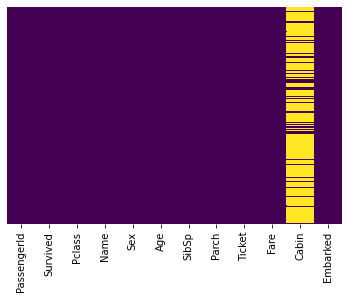

In [7]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Checking the heatmap shows us we have successfully filled in the missing 'Age' values.

Now it's time to see what we can do about the 'Cabin' column.

It has nearly all of its data missing, and we can't do anything useful with it. So better off dropping that column entirely.

In [8]:
train.drop('Cabin', axis=1, inplace=True)

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


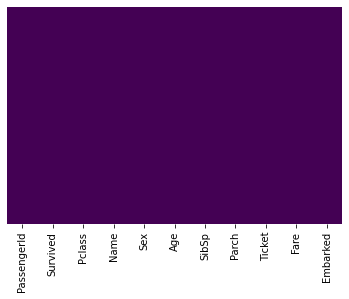

In [10]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Now, we convert categorical features to dummy variables using pandas. 

For example the 'Sex' column needs to be changed because the ML algorithms won't be able to just take a 'male' or 'female' feature as input.

In [11]:
## We pass in the 'Sex' column into get_dummies
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


An issue rises here called multi-colinearity.

Which is the ML algorithm can 100% perdict that if it's 0 on female, it's definitely 1 on male. It will mess up with the algorithm, because some columns are perfect predictors of others. Let's try again.

In [12]:
sex = pd.get_dummies(train['Sex'], drop_first = True)

In [13]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


Now we have only one column. Whether this person is male or not, is enough for the algorithm to function.

Now we're going to do the same thing for the 'Embarked' column.

In [14]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [15]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


Not every column is another's perfect predictor as we dropped that C column.

We use concatenation to add these new columns into the dataframe.

We want sex and embark to be added as new columns:

In [16]:
train = pd.concat([train,sex,embark], axis = 1)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


We see **'male'** and **'Q'** and **'S'**

Which are going to be of use to our machine learning algorithm.

Now we don't have any use for ***'Sex'*** column and for ***'Embarked'***.

We also don't have any use for ***'Ticket'*** and ***'Name'***

In [18]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [19]:
train.drop(['PassengerId'], axis = 1, inplace = True)

In [ ]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Part III: Training a Model

On whether a passenger survived or not on the Titanic

In [20]:
# y is the actual label we're going to predict, and X is every other feature
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Now we have each of out X_test etc. datasets ready

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logmodel = LogisticRegression()

In [28]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
predictions = logmodel.predict(X_test)

Now let's evaluate our model

In [30]:
from sklearn.metrics import classification_report

In [31]:
print (classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



If we want to calculate a specific value, we do a confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_test, predictions)

array([[133,  21],
       [ 38,  76]])